In [5]:
import torch
# import torchvision
# import iecdt_lab
from torch import nn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import tqdm
import numpy as np
import pandas as pd

In [4]:
TILES_FILE = "/gws/nopw/j04/iecdt/deep_learning_lab/1km_naturalcolor_numpy"
TEST_METADATA = "/gws/nopw/j04/iecdt/deep_learning_lab/1km_naturalcolor_metadata_time_test.csv"
TILES_STATISTICS = "/gws/nopw/j04/iecdt/deep_learning_lab/1km_naturalcolor_metadata_rgb_stats.npz"

In [6]:
# Load the CSV file
def summarize_csv(file_path):
    try:
        df = pd.read_csv(file_path)
        
        # Display basic info
        print("Basic Info:")
        print(df.info())
        
        # Display summary statistics
        print("\nSummary Statistics:")
        print(df.describe(include='all'))
        
        # Check for missing values
        print("\nMissing Values:")
        print(df.isnull().sum())
        
        # Display first few rows
        print("\nFirst 5 Rows:")
        print(df.head())
        
    except Exception as e:
        print(f"Error: {e}")

# Run the summarization
summarize_csv(TEST_METADATA)

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3696 entries, 0 to 3695
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tile_id                 3696 non-null   int64  
 1   time_ix                 3696 non-null   int64  
 2   lat_ix                  3696 non-null   object 
 3   lon_ix                  3696 non-null   object 
 4   mean_cloud_lengthscale  3696 non-null   float64
 5   cloud_fraction          3696 non-null   float64
 6   cloud_iorg              3696 non-null   float64
 7   fractal_dimension       3696 non-null   float64
 8   open_sky                3696 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 260.0+ KB
None

Summary Statistics:
             tile_id      time_ix                 lat_ix  \
count    3696.000000  3696.000000                   3696   
unique           NaN          NaN                      7   
top              NaN         

In [9]:
example_data_file_path = "/gws/nopw/j04/iecdt/deep_learning_lab/1km_naturalcolor_numpy/107/time_step.npy"

def analyze_npy(file_path):
    try:
        data = np.load(file_path)
        
        # Display basic statistics
        print("\nNumPy Array Analysis:")
        print(f"Shape: {data.shape}")
        print(f"Data Type: {data.dtype}")
        print(f"Min: {np.min(data)}, Max: {np.max(data)}")
        print(f"Mean: {np.mean(data)}, Std: {np.std(data)}")
        print(f"First 5 Elements: {data.flatten()[:5]}")
        return data
    except Exception as e:
        print(f"Error: {e}")

In [11]:
data = analyze_npy(example_data_file_path)


NumPy Array Analysis:
Shape: (2220, 3129, 3)
Data Type: float32
Min: nan, Max: nan
Mean: nan, Std: nan
First 5 Elements: [0.70740235 0.736246   0.76437366 0.70740235 0.736246  ]


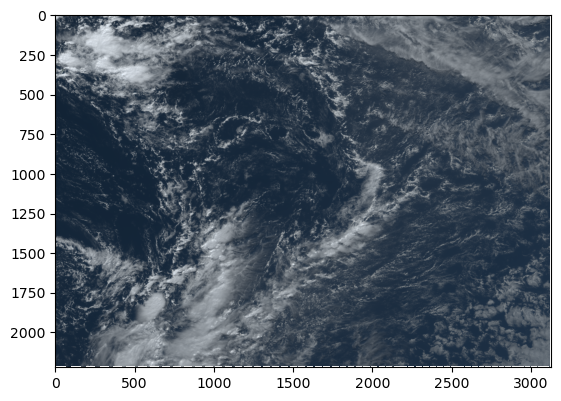

In [14]:
plt.imshow(data)

In [16]:
# Get metadata for cloud fraction under a threshold
def get_low_cloud_fraction(file_path, threshold):
    try:
        df = pd.read_csv(file_path)
        filtered_df = df[df['cloud_fraction'] < threshold]
        
        print("\nFiltered Metadata:")
        print(filtered_df)
        
        return filtered_df
    except Exception as e:
        print(f"Error: {e}")
        return None



In [17]:
filtered_df = get_low_cloud_fraction(TEST_METADATA, 0.8)




Filtered Metadata:
      tile_id  time_ix                   lat_ix                   lon_ix  \
0       14996      196    slice(256, 512, None)    slice(256, 512, None)   
2       14998      196    slice(256, 512, None)   slice(768, 1024, None)   
3       14999      196    slice(256, 512, None)  slice(1024, 1280, None)   
4       15000      196    slice(256, 512, None)  slice(1280, 1536, None)   
5       15001      196    slice(256, 512, None)  slice(1536, 1792, None)   
...       ...      ...                      ...                      ...   
3687    18683      243  slice(1792, 2048, None)   slice(768, 1024, None)   
3688    18684      243  slice(1792, 2048, None)  slice(1024, 1280, None)   
3689    18685      243  slice(1792, 2048, None)  slice(1280, 1536, None)   
3691    18687      243  slice(1792, 2048, None)  slice(1792, 2048, None)   
3692    18688      243  slice(1792, 2048, None)  slice(2048, 2304, None)   

      mean_cloud_lengthscale  cloud_fraction  cloud_iorg  fractal_d

,tile_id,time_ix,lat_ix,lon_ix,mean_cloud_lengthscale,cloud_fraction,cloud_iorg,fractal_dimension,open_sky
0,14996,196,"slice(256, 512, None)","slice(256, 512, None)",11.149860,0.362320,0.600263,1.729983,0.570190
2,14998,196,"slice(256, 512, None)","slice(768, 1024, None)",32.155540,0.741531,0.712441,1.548636,0.368317
3,14999,196,"slice(256, 512, None)","slice(1024, 1280, None)",14.798422,0.497894,0.578765,1.733564,0.202332
4,15000,196,"slice(256, 512, None)","slice(1280, 1536, None)",33.212470,0.740585,0.711994,1.580975,0.117615
5,15001,196,"slice(256, 512, None)","slice(1536, 1792, None)",24.446131,0.683914,0.693066,1.630336,0.180908
...,...,...,...,...,...,...,...,...,...
3687,18683,243,"slice(1792, 2048, None)","slice(768, 1024, None)",34.426595,0.759552,0.633794,1.761593,0.047607
3688,18684,243,"slice(1792, 2048, None)","slice(1024, 1280, None)",28.197848,0.715820,0.682648,1.787072,0.056808
3689,18685,243,"slice(1792, 2048, None)","slice(1280, 1536, None)",16.504917,0.473862,0.602773,1.817959,0.157104
3691,18687,243,"slice(1792, 2048, None)","slice(1792, 2048, None)",28.903428,0.624619,0.563752,1.672737,0.226944
